In [43]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
class Perceptron:
    
    def __init__(self, w=np.array([])):
        """ Can optionally input the weight array on Perceptron instantiaion.
        """
        self._w = np.array(w)
    
    def predict(self, x):
        """ Given an input vector x, predict the output.
        """
        x = np.array(x)
        
        # Take dot product of weight column vector w and input row vector x (both of 3 elements).
        a = np.dot(self._w, x)
        
        pred = np.sign(a)
        # Ensure 0 is not an optional classificaiton.
        if pred == 0:
            pred = 1
        
        return pred
    
    def setWeights(self, w):
        self._w = w
    
    def getWeights(self):
        return self._w

In [143]:
# 1.4 a) Randomly generate a target function.
w = np.random.uniform(-5, 5, 3)
w

array([-3.97303591,  2.15931355,  3.72110449])

In [144]:
# 1.4 a) Randomly generate data around the target function.

def genData(N, wTarget, xDim=2):
    
    # Assume we want an equal number of positively as negatively classified points.
    NPos = N/2
    NNeg = N - NPos

    # Initialize perceptron to test where input should fall relative to target function.
    percy = Perceptron(wTarget)

    # Initialize array to hold data (x values and classification).
    D = []

    # Generate data with positive classifications.
    posCount = 0
    while (posCount < NPos):
        # Generate data point.
        # Initial 1 is to match bias weight.
        d = [1]
        # Generate a value for each dimension of the input.
        for i in range(0, xDim):
            d.append(np.random.uniform(-5,5))
        # Append the positive classification.
        d.append(1)

        # Check if data point is positive as per target function.
        pred = percy.predict(d[0:xDim+1])

        if (pred == 1):
            D.append(d)
            posCount += 1

    # Generate data with negative classifications.
    negCount = 0
    while (negCount < NNeg):
        # Generate data point.
        # Initial 1 is to match bias weight.
        d = [1]
        # Generate a value for each dimension of the input.
        for i in range(0, xDim):
            d.append(np.random.uniform(-5,5))
        # Append the positive classification.
        d.append(-1)

        # Check if data point is negative as per target function.
        pred = percy.predict(d[0:xDim+1])

        if (pred == -1):
            D.append(d)
            negCount += 1

    return np.array(D)

[[ 1.          3.2275147  -0.35299691  1.        ]
 [ 1.          1.63481208  4.20317239  1.        ]
 [ 1.         -3.73018815  4.4630251   1.        ]
 ...
 [ 1.         -0.21476467 -1.52066112 -1.        ]
 [ 1.          0.34081103 -0.73641409 -1.        ]
 [ 1.         -0.26951316 -2.79788708 -1.        ]]


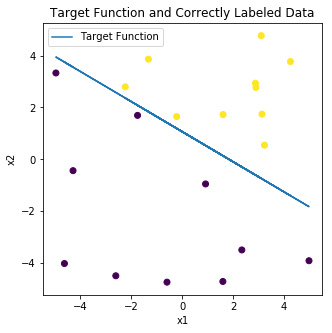

In [160]:
# 1.4 a) Plot data and target function.
print(D)
D = genData(20, w)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# First, plot predictions and the decision boundary
ax.set_title("Target Function and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

ax.scatter(D[:,1], D[:,2], c=D[:,3])

tf = lambda d: (- w[0] - w[1]*d[1])/w[2]
tf = map(tf, D)
ax.plot(D[:,1], list(tf), label="Target Function")
ax.legend()

In [135]:
class PLA:
    
    def __init__(self, percy, D):
        """ Provide a perceptron object and data on which to train its weights.
        """
        self._percy = percy
        self._D = D
        self._xDim = len(self._D[0]) - 2
        self._numUpdates = 0
    
    def isMisclassified(self, d):
        """ Return True if point is misclassified, false otherwise.
        """
        if (self._percy.predict(d[0:self._xDim+1]) != d[self._xDim+1]):
            return True
        
        else:
            return False
    
    def run(self):
        
        # Iterate over data points, adjusting weights upon finding misclassifications.
        misclassified = True
        while misclassified:
            
            d = self._D[np.random.randint(0, len(self._D)-1)]
            
            if self.isMisclassified(d):
                # Perform weight update.
                w = self._percy.getWeights()
                
                wNew = w + d[self._xDim+1]*d[0:self._xDim+1]
                
                self._percy.setWeights(wNew)
                
                self._numUpdates += 1
            
            # If all points are correctly classified, then we can terminate.
            for i in range(0, len(self._D)):
                if self.isMisclassified(self._D[i]):
                    break
                # Points are all correctly classified if we have not broken the loop after iterating over all examples.
                elif i == len(self._D) - 1:
                    misclassified = False
    
    def getNumUpdates(self):
        return self._numUpdates
        

In [161]:
# 1.4 b) Run PLA on data generated in 1.4 a.

wInit = np.random.uniform(-5, 5, 3)
print("Initial random weights: " + str(wInit))
percy = Perceptron(wInit)
pla = PLA(percy, D)
pla.run()
wHypoth = percy.getWeights()
print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(w))

Initial random weights: [ 3.21723953  3.41726927 -2.09743656]
Number of updates: 19
Weights after PLA: [-5.78276047  4.21619374  6.15622858]
Target weights: [-3.97303591  2.15931355  3.72110449]


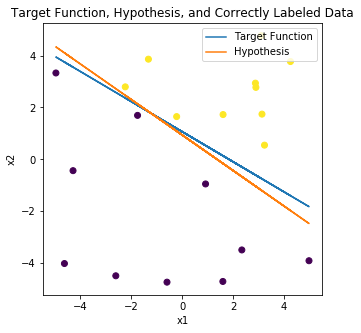

In [162]:
# 1.4 b) Plot data, target function, and hypothesis.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(D[:,1], D[:,2], c=D[:,3])

# Plot target function.
tf = lambda d: (- w[0] - w[1]*d[1])/w[2]
tf = map(tf, D)
ax.plot(D[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, D)
ax.plot(D[:,1], list(g), label="Hypothesis")
ax.legend()

Initial random weights: [-1.68458611 -4.34288119 -3.03242876]
Number of updates: 13
Weights after PLA: [-0.68458611  4.59449034 10.10759601]
Target weights: [-3.97303591  2.15931355  3.72110449]


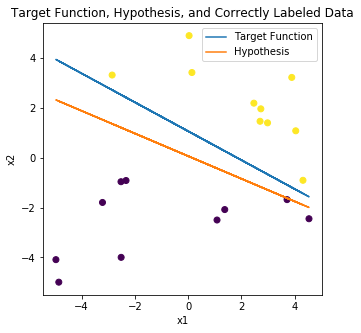

In [156]:
# 1.4 c) Repeat b but with new dataset of size 20.

# Generate Data.
D = genData(20, w)

# Initialize weights.
wInit = np.random.uniform(-5, 5, 3)
print("Initial random weights: " + str(wInit))

# Run PLA.
percy = Perceptron(wInit)
pla = PLA(percy, D)
pla.run()
wHypoth = percy.getWeights()
print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(w))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(D[:,1], D[:,2], c=D[:,3])

# Plot target function.
tf = lambda d: (- w[0] - w[1]*d[1])/w[2]
tf = map(tf, D)
ax.plot(D[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, D)
ax.plot(D[:,1], list(g), label="Hypothesis")
ax.legend()

Initial random weights: [-0.9298761  -0.72488125 -4.38450041]
Number of updates: 24
Weights after PLA: [-8.9298761   5.35239896  8.77736012]
Target weights: [-3.97303591  2.15931355  3.72110449]


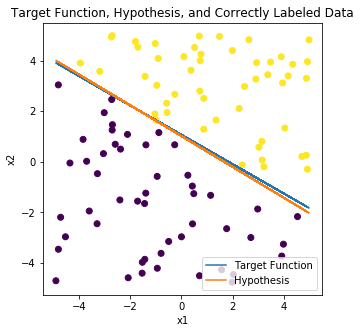

In [157]:
# 1.4 d) Repeat b but with new dataset of size 100.

# Generate Data.
D = genData(100, w)

# Initialize weights.
wInit = np.random.uniform(-5, 5, 3)
print("Initial random weights: " + str(wInit))

# Run PLA.
percy = Perceptron(wInit)
pla = PLA(percy, D)
pla.run()
wHypoth = percy.getWeights()
print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(w))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(D[:,1], D[:,2], c=D[:,3])

# Plot target function.
tf = lambda d: (- w[0] - w[1]*d[1])/w[2]
tf = map(tf, D)
ax.plot(D[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, D)
ax.plot(D[:,1], list(g), label="Hypothesis")
ax.legend()

Initial random weights: [-3.11791534 -4.08302351 -1.06368281]
Number of updates: 213
Weights after PLA: [-30.11791534  16.73219323  28.87906541]
Target weights: [-3.97303591  2.15931355  3.72110449]


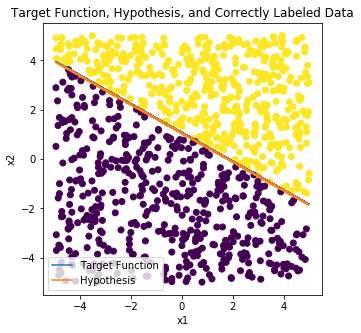

In [158]:
# 1.4 e) Repeat b but with new dataset of size 1000.

# Generate Data.
D = genData(1000, w)

# Initialize weights.
wInit = np.random.uniform(-5, 5, 3)
print("Initial random weights: " + str(wInit))

# Run PLA.
percy = Perceptron(wInit)
pla = PLA(percy, D)
pla.run()
wHypoth = percy.getWeights()
print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(w))

# Plot results.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Target Function, Hypothesis, and Correctly Labeled Data")
ax.set_ylabel("x2")
ax.set_xlabel("x1")

# Plot data points and labels.
ax.scatter(D[:,1], D[:,2], c=D[:,3])

# Plot target function.
tf = lambda d: (- w[0] - w[1]*d[1])/w[2]
tf = map(tf, D)
ax.plot(D[:,1], list(tf), label="Target Function")

# Plot hypothesis.
g = lambda d: (- wHypoth[0] - wHypoth[1]*d[1])/wHypoth[2]
g = map(g, D)
ax.plot(D[:,1], list(g), label="Hypothesis")
ax.legend()

In [151]:
# 1.4 f) Apply algorithm to ten-dimensional input.

xDim = 10

# New target function (+1 dimension because of bias):
wf = np.random.uniform(-5, 5, xDim + 1)

# Generate Data.
D = genData(1000, wf, xDim)

# Initialize weights.
wInit = np.random.uniform(-5, 5, xDim + 1)
print("Initial random weights: " + str(wInit))

# Run PLA.
percy = Perceptron(wInit)
pla = PLA(percy, D)
pla.run()
wHypoth = percy.getWeights()
print("Number of updates: " + str(pla.getNumUpdates()))
print("Weights after PLA: " + str(wHypoth))
print("Target weights: " + str(wf))

Initial random weights: [-1.62726841 -3.69635042  4.38113109  1.33380041  0.1358741  -3.62417453
 -4.11048858  0.03373934 -0.02935961 -2.87719304  4.95082666]
Number of updates: 2067
Weights after PLA: [  39.37273159  -74.82358429   51.13469664   99.82119505   65.57043158
 -149.20481463  130.60711627    8.04222063 -130.03021531 -106.56991906
  109.38413497]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]


In [154]:
# 1.4 g) Run algorithm on same data as f for 100 experiments.

expNum = 1

numUpdates = []
while (expNum <= 100):
    print("Experiment Number: " + str(expNum))
    
    # Initialize weights.
    wInit = np.random.uniform(-5, 5, xDim + 1)
    print("Initial random weights: " + str(wInit))

    # Run PLA.
    percy = Perceptron(wInit)
    pla = PLA(percy, D)
    pla.run()
    wHypoth = percy.getWeights()
    numUpdates.append(pla.getNumUpdates())
    print("Number of updates: " + str(pla.getNumUpdates()))
    print("Weights after PLA: " + str(wHypoth))
    print("Target weights: " + str(wf))
    
    expNum += 1
    
    print("--------------------")

Experiment Number: 1
Initial random weights: [ 1.29620652 -2.08227451 -2.41665353 -0.7595276  -0.16275756 -4.03095184
  2.18016377  3.95015191 -0.75189216  3.54016147 -1.62355569]
Number of updates: 1952
Weights after PLA: [  35.29620652  -75.90444507   49.37733159   99.00261178   59.28645635
 -139.33819297  124.77930088   11.21338224 -126.67355784 -101.90753675
  104.30558137]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 2
Initial random weights: [ 1.08740334  0.03069295  4.06975048  0.8878319  -4.10152721  2.72777381
  3.5122302  -4.19726828  2.72813003  4.56688822  2.73624231]
Number of updates: 1751
Weights after PLA: [  36.08740334  -67.90199742   45.87332524   89.78390589   57.70178977
 -132.44780561  118.10841108    9.79214462 -114.61728751  -96.84987129
  100.29271349]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  

Number of updates: 2786
Weights after PLA: [  43.63085444  -92.32199242   61.61583492  116.02787173   76.36172285
 -169.93726192  154.37988097   10.91487314 -151.23223271 -126.66383486
  131.15058566]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 17
Initial random weights: [ 3.8071606   2.75730855  4.77386014  1.92915772  4.46104071  2.27718115
  1.76941996  2.36069613  0.91023186 -0.99376927  3.99333709]
Number of updates: 1824
Weights after PLA: [  35.8071606   -70.01240474   44.23110538   94.3956346    57.51893292
 -136.68680113  117.87305467   11.58969195 -119.68326619 -100.58081539
  102.01776276]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 18
Initial random weights: [-0.65631808 -2.5563822  -3

Number of updates: 1992
Weights after PLA: [  41.59681723  -75.67519235   49.56007242   95.74412976   63.11134056
 -141.74432176  126.56840579   10.97197617 -124.73374335 -105.41446598
  108.27853456]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 32
Initial random weights: [-4.7405068  -2.08630086  3.98807982 -1.4081773   2.59111324 -2.01317011
  0.936559    2.76210886 -3.13927801  0.28612755  1.03883118]
Number of updates: 2315
Weights after PLA: [  40.2594932   -79.57703347   54.38095575  105.33100711   66.93349727
 -153.42145601  136.08632737    7.19306977 -137.94933903 -113.04502132
  115.11667655]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 33
Initial random weights: [ 3.60582454 -2.65241275 -4

Number of updates: 1772
Weights after PLA: [  34.96937365  -69.40828057   50.01560133   91.13511554   53.96225615
 -133.42469132  120.1815332     8.98979548 -118.16773455  -96.97158599
   97.90036646]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 47
Initial random weights: [-2.263494   -4.50954837 -1.28077193 -3.11581376  3.91976188 -2.02710964
  4.94706197 -4.60745214 -0.71598723 -1.63087505 -4.75213687]
Number of updates: 1719
Weights after PLA: [  36.736506    -68.67079422   47.91210127   88.33371079   55.69007267
 -130.87239092  117.9681375     6.53277852 -116.78778814  -97.02008762
   97.82387005]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 48
Initial random weights: [-1.39481005 -4.86454123 -3

Number of updates: 1798
Weights after PLA: [  36.28905074  -68.26777412   46.37741977   92.59565485   60.81523733
 -135.69960803  118.49048896    8.47800191 -122.42087309  -96.44093961
   99.82614478]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 62
Initial random weights: [ 1.29607767 -3.59786241  1.10609612 -4.35382298 -3.61928741  1.17493051
 -2.59781319  2.39463245 -4.55239835  0.11077192  1.05430602]
Number of updates: 1922
Weights after PLA: [  37.29607767  -71.20803441   48.49382745   95.53288688   60.67495259
 -142.31281359  125.17163377    7.34573965 -123.80984564 -100.74117295
  103.96791246]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 63
Initial random weights: [ 2.90928611  4.02145932 -2

Number of updates: 1942
Weights after PLA: [  32.00035524  -70.49281254   53.98969052   93.75622383   59.49270561
 -140.59410446  124.22606865   10.89731039 -122.5832852  -102.66437387
  101.90544821]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 77
Initial random weights: [ 2.22013006  2.9680709   4.81117868 -4.38109549  2.11797551  1.45315922
  0.38004751  3.75579144 -4.88179029  1.92675424 -0.49684058]
Number of updates: 2038
Weights after PLA: [  40.22013006  -73.99506187   51.67634809   99.45939973   60.44005315
 -147.46131361  127.34838929   11.45132538 -128.57946521 -105.33390446
  109.70869795]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 78
Initial random weights: [ 3.20519348 -1.58934164  0

Number of updates: 2045
Weights after PLA: [  41.51137336  -75.86937273   47.89857728  100.18688194   60.7834032
 -144.47329464  124.95189513   12.27667029 -129.13835702 -109.58505862
  107.79872926]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 92
Initial random weights: [-0.64632339  1.42997657 -2.91294142  4.43078008 -3.07670464  2.97964823
 -3.63918213 -0.19419637 -4.1387586   0.22108908 -0.45365889]
Number of updates: 1949
Weights after PLA: [  36.35367661  -74.85951381   48.92195349   96.57610099   61.86665341
 -140.82731954  126.78925833    9.0166244  -126.41560707 -104.45382582
  107.38057683]
Target weights: [ 1.25492153 -2.21918321  1.44181868  3.03527963  1.86179521 -4.25723499
  3.7093128   0.27300634 -3.87122301 -3.05810676  3.17504757]
--------------------
Experiment Number: 93
Initial random weights: [-2.10435967  0.3927086   2.

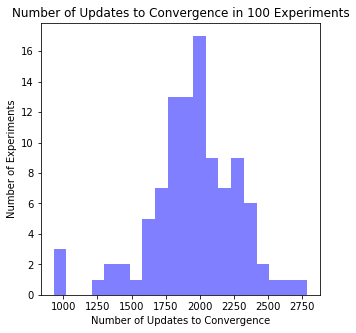

1949.88


In [168]:
# 1.4 g) Plot a histogram of number of updates to convergence.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.set_title("Number of Updates to Convergence in 100 Experiments")
ax.set_ylabel("Number of Experiments")
ax.set_xlabel("Number of Updates to Convergence")

n, bins, patches = ax.hist(numUpdates, 20, facecolor='blue', alpha=0.5)
plt.show()

print(np.mean(numUpdates))